In [1]:
# Add parent directory
from sys import path as sysPath
sysPath.append('../')

# Add custom modules
sysPath.append('../Machine_Score/')

from Support_Code import general_module as gm
from Support_Code import info_module as im
from Image_Creator import main_image_creator as ic
from Machine_Score import main_machine_score as ms
from Machine_Score import direct_image_compare as dc
from Score_Analysis import main_score_analysis as sa
import main_SIMR as simr

# General modules
from os import path
import numpy as np
from matplotlib import pyplot as plt

sa.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
simr.test()

SA: Hi!  You're in Matthew's Main program for score analysis!
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DI: Hi!  You're in direct_image_compare.py
SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions


In [5]:
tDir = '../../587722984435351614/'

tInfo = im.target_info_class( targetDir = tDir, printAll=True)

if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

IM: target_info_class.__init__:
	 - targetDir:  ../../587722984435351614/
IM: Target.initTargetDir():
	 - targetDir: ../../587722984435351614/
NEW PATH EXISTS: /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/zoo_merger_models/
	 - targetDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/
	 - infoDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/information/
	 - baseInfoLoc: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/information/base_target_info.json
	 - allInfoLoc: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/information/target_info.json
	 - zooMergerDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/zoo_merger_models/
	 - plotDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/plots/
IM: Target: Opening target info json
Target Good!


In [7]:
tScores = tInfo.getScores()
#print(tScores)

YAYYYY
base0_corr: 1292/1293 -0.17756592585062825
base0_diff: 1292/1293 -0.22702990422244948
base0_diff_scale: 1292/1293 -0.32438751118153764
base0_diff_scale1: 1292/1293 -0.22702990422244954
base0_diff_scale2: 1292/1293 -0.22702990422244948
base0_overlap0: 1292/1293 -0.27640388456601506
base0_overlap1: 1292/1293 -0.40060724632114725
base0_overlap2: 1292/1293 0.05261224972657059
base0_overlap3: 1292/1293 -0.3936702176533637
base0_bcorr0: 1292/1293 -0.33060938276232243
base0_bcorr1: 1292/1293 -0.4009357822864823
base0_bcorr2: 1292/1293 -0.39819648354225545
base0_bcorr3: 1292/1293 -0.06492150806511401
PLotLoc:  /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/plots/basic_target_report.pdf


"\nfrom os import listdir\n\ndDir = gm.validPath( '../../tmp_scores' )\nplotDir = gm.validPath( '../../tmp_plots' )\ntList = listdir( dDir )\nprint(plotDir)\n\nfor tName in tList:\n    \n    sLoc = gm.validPath( dDir + tName + '/information/scores.csv' )\n    pLoc = plotDir + tName + '.png'\n    print(pLoc)\n    \n    if sLoc == None:\n        continue\n    \n    #scores = gm.getScores(sLoc)\n    \n    target_report_1( scoreLoc = sLoc, plotLoc = pLoc )\n"

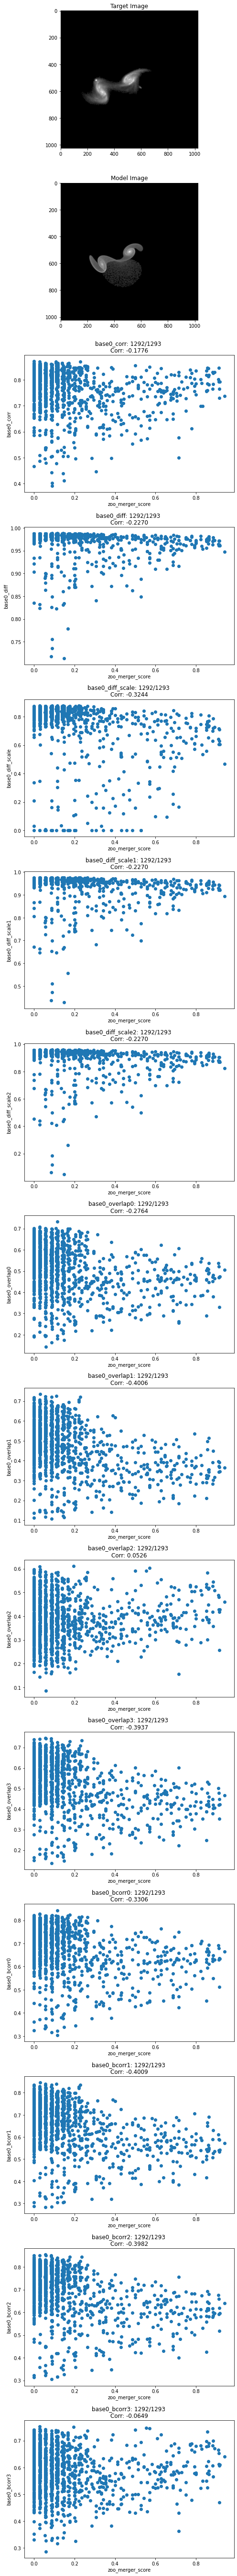

In [9]:
def target_report_1( tInfo=None, scoreLoc = None, plotLoc = None):
    
    from copy import deepcopy
    
    if tInfo != None:
        scores = tInfo.getScores()
    elif scoreLoc != None:
        scores = gm.getScores(scoreLoc)
    
    scoreHeaders = list( scores.columns )
    
    msNames = deepcopy(scoreHeaders)
    msNames.pop(0)
    msNames.pop(0)
    
    n = len(msNames)
    
    if n == 0:
        print('NNOOOOOOO')
    else:
        print("YAYYYY")
    
    fig, axs = plt.subplots( n+2, figsize=(7,5*(n+2)) )    
    
    if tInfo != None:
        # Show target image
        tImg = tInfo.getTargetImage( 'zoo' )
        axs[0].imshow(tImg, cmap='gray')
        axs[0].set_title("Target Image")

        # Show a model image
        rId = 'r00001'
        runArg = gm.inArgClass()
        runArg.setArg("printBase",False)
        rInfo = tInfo.getRunInfo(rID=rId, rArg = runArg)
        rImg = rInfo.getModelImg( )
        rN = scores.shape[0]

        if type(rImg) != type(None):
            axs[1].imshow(rImg, cmap='gray')
            axs[1].set_title('Model Image')

    # Get human scores
    hScores = scores['zoo_merger_score']
    
    # Go through and plot stuff
    for i, sName in enumerate(msNames):     
        hmScores = scores[['zoo_merger_score',sName]].dropna()
        hScores = hmScores['zoo_merger_score'].values
        mScores = hmScores[sName].values
        corr = np.corrcoef( hScores, mScores )[0,1]
        print('%s: %4d/%4d' % (sName,hmScores.shape[0],rN), corr)
        
        hs = { 'scores':hScores, 'name':'zoo_merger_score' }
        ms = { 'scores':mScores, 'name':sName }   
                
        title = '%s: %4d/%4d ' % (sName,hmScores.shape[0],rN) 
        title += '\nCorr: %.4f' % corr
        
        sa.basicSubPlot( axs[i+2], hs, ms, titleName=title)
    plt.tight_layout()
    
    if tInfo != None:
        plotLoc = tInfo.plotDir + 'basic_target_report.pdf'
        print('PLotLoc: ', plotLoc)
        fig.savefig(plotLoc, bbox_inches='tight')


target_report_1(tInfo=tInfo)
'''
from os import listdir

dDir = gm.validPath( '../../tmp_scores' )
plotDir = gm.validPath( '../../tmp_plots' )
tList = listdir( dDir )
print(plotDir)

for tName in tList:
    
    sLoc = gm.validPath( dDir + tName + '/information/scores.csv' )
    pLoc = plotDir + tName + '.png'
    print(pLoc)
    
    if sLoc == None:
        continue
    
    #scores = gm.getScores(sLoc)
    
    target_report_1( scoreLoc = sLoc, plotLoc = pLoc )
'''

YAYYYY
base0_corr: 1292/1293 -0.17756592585062836
base0_diff: 1292/1293 -0.22702990422244954
base0_diff_scale: 1292/1293 -0.32438751118153764
base0_diff_scale1: 1292/1293 -0.22702990422244945
base0_diff_scale2: 1292/1293 -0.22702990422244942
base0_overlap0: 1292/1293 -0.276403884566015
base0_overlap1: 1292/1293 -0.40060724632114725
base0_overlap2: 1292/1293 0.05261224972657061
base0_overlap3: 1292/1293 -0.3936702176533638
base0_bcorr0: 1292/1293 -0.33060938276232255
base0_bcorr1: 1292/1293 -0.40093578228648236
base0_bcorr2: 1292/1293 -0.39819648354225556
base0_bcorr3: 1292/1293 -0.06492150806511401
PLotLoc:  /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/targetDir/plots/basic_target_report.pdf


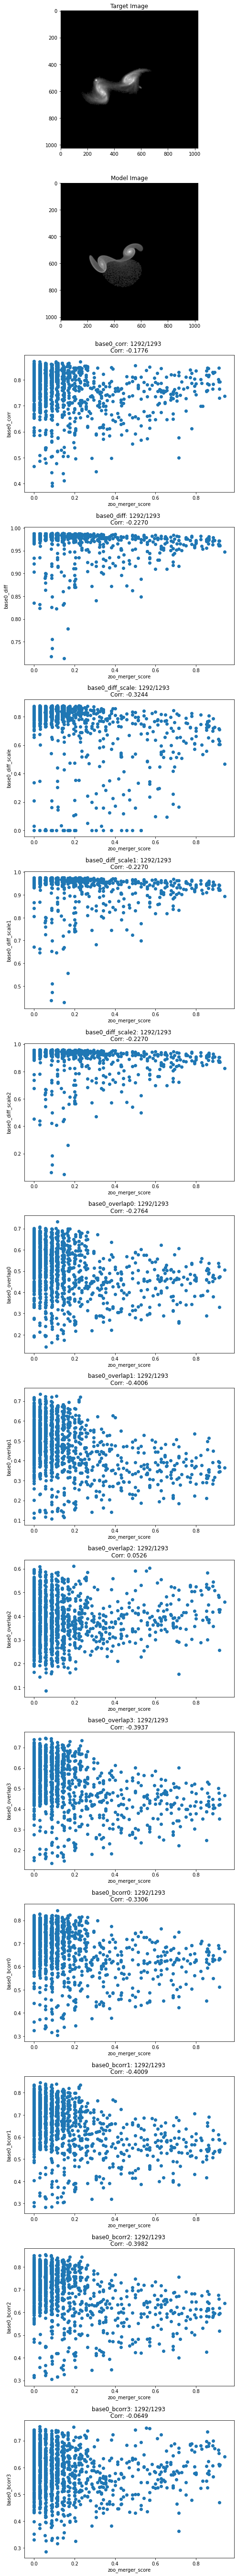

In [13]:
target_report_1(tInfo=tInfo)


In [ ]:
def from_score_files